# My First Convolutional Neural Network : CIFAR-10
---
#### 실습목표
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

## Real Game : CNN on CIFAR-10

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [ ]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

### Data Loading

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

In [ ]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
labels = { 0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 9413
다음 그림은 Airplane 입니다.


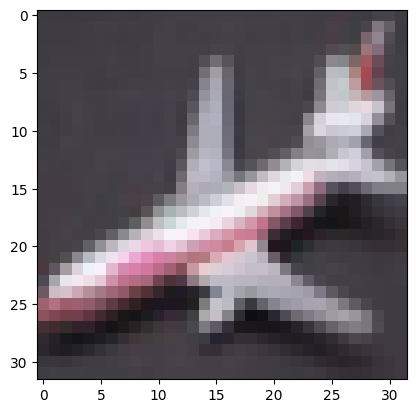

In [ ]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id][0]]} 입니다.')
plt.imshow(test_x[id])
plt.show()

### X : 표준화 Scaling (standardization)

$$ X_{scaled} = {{x_{original} - mean(x)}\over{std(x)} } $$

In [ ]:
mean, std = train_x.mean(), train_x.std()

In [ ]:
train_x = (train_x - mean)/std

In [ ]:
test_x = (test_x - mean)/std

### Y : One-Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
class_n = len(np.unique(train_y))

In [ ]:
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [ ]:
train_y.shape, test_y.shape

((50000, 10), (10000, 10))

In [ ]:
test_y[:5]

array([3, 8, 8, 0, 6])

### 코드를 완성해주세요!

- 조건
    - **model.fit( ) 을 history 에 담아서 학습 과정의 로그를 남길 것.**
    - EarlyStopping 의 옵션도 조절해보자.
---

- **자유롭게 먼저 해보는 것을 추천**

---

- **구조를 따라서 코딩을 한다면**
    0. Functional, Sequential 중 택일
    1. 인풋레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    4. BatchNormalization
    5. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    6. DropOut : 25% 비활성화
    7. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    11. DropOut : 25% 비활성화
    12. Flatten( )
    13. Fully Connected Layer : 노드 1024개
    14. BatchNormalization
    15. DropOut : 35% 비활성화
    16. 아웃풋레이어



In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten
from tensorflow.keras.backend import clear_session

In [ ]:
from warnings import filters
from keras.src import backend
# 세션 클리어

# 레이어 사슬처럼 연결
# 1. 인풋레이어
X = Input(shape=(32, 32, 3))
# 2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
H = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(X)
# 3. Convolution : 필터수 32개, 사이즈(3, 3), same padding
H = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(H)
# 4. BatchNormalization
H = BatchNormalization()(H)
# 5. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
H = MaxPool2D(pool_size=(2,2), strides=(2,2))(H)
# 6. DropOut : 25% 비활성화
H = Dropout(0.25)(H)
# 7. Convolution : 필터수 64개, 사이즈(3, 3), same padding
H = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(H)
# 8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
H = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(H)
# 9. BatchNormalization
H = BatchNormalization()(H)
# 10. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
H = MaxPool2D(pool_size=(2,2), strides=(2,2))(H)
# 11. DropOut : 25% 비활성화
H = Dropout(0.25)(H)
# 12. Flatten( )
H = Flatten()(H)
# 13. Fully Connected Layer : 노드 1024개
H = Dense(1024, activation='relu')(H)
# 14. BatchNormalization
H = BatchNormalization()(H)
# 15. DropOut : 35% 비활성화
H = Dropout(0.35)(H)
# 16. 아웃풋레이어
Y = Dense(10, activation='softmax')(H)
# 모델 시작과 끝 지정
model = Model(X, Y)
# 모델 컴파
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_16 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 16, 16, 32)        0   

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='val_loss', min_delta=0, restore_best_weights=True, patience=5, verbose=1)

In [ ]:
history = model.fit(train_x, train_y, epochs=10000, validation_split=0.2, verbose=1, callbacks=[es])

Epoch 1/10000
1250/1250 [==============================] - 65s 49ms/step - loss: 1.5844 - accuracy: 0.4827 - val_loss: 1.2208 - val_accuracy: 0.5771
Epoch 2/10000
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0671 - accuracy: 0.6303 - val_loss: 1.1130 - val_accuracy: 0.6351
Epoch 3/10000
1250/1250 [==============================] - 11s 8ms/step - loss: 0.9199 - accuracy: 0.6790 - val_loss: 0.8889 - val_accuracy: 0.6919
Epoch 4/10000
1250/1250 [==============================] - 10s 8ms/step - loss: 0.8272 - accuracy: 0.7124 - val_loss: 0.8075 - val_accuracy: 0.7204
Epoch 5/10000
1250/1250 [==============================] - 9s 8ms/step - loss: 0.7494 - accuracy: 0.7380 - val_loss: 0.8888 - val_accuracy: 0.7034
Epoch 6/10000
1250/1250 [==============================] - 10s 8ms/step - loss: 0.6860 - accuracy: 0.7614 - val_loss: 0.7730 - val_accuracy: 0.7448
Epoch 7/10000
1250/1250 [==============================] - 10s 8ms/step - loss: 0.6149 - accuracy: 0.7868 - val_

### 성능 평가

In [ ]:
performance_test = model.evaluate(test_x, test_y, batch_size=100)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

100/100 [==============================] - 0s 5ms/step - loss: 0.6576 - accuracy: 0.7852
Test Loss : 0.657645,  Test Accuracy : 78.520%


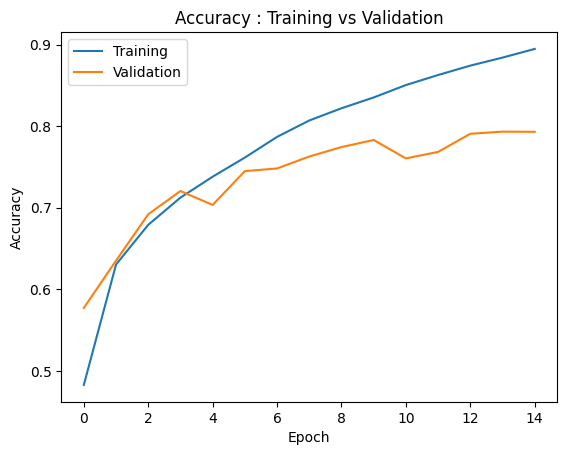

In [ ]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

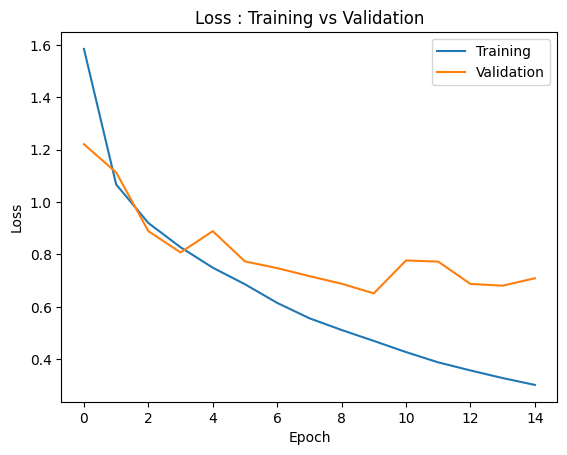

In [ ]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [ ]:
# 원핫 인코딩 해제 : 카테고리 중 가장 높은 값
train_y = train_y.argmax(axis=1)
test_y = test_y.argmax(axis=1)

In [ ]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y, single_pred_train)
logi_test_accuracy = accuracy_score(test_y, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%')
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%')

313/313 [==============================] - 1s 2ms/step
CNN
트레이닝 정확도 : 90.30%
테스트 정확도 : 78.52%


id = 5683
다음 그림은 Frog 입니다.
모델의 예측 : Frog
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 0.0, 'Bird': 1.0, 'Cat': 0.0, 'Deer': 0.0, 'Dog': 0.0, 'Frog': 98.0, 'Horse': 0.0, 'Ship': 0.0, 'Truck': 0.0}
정답입니다


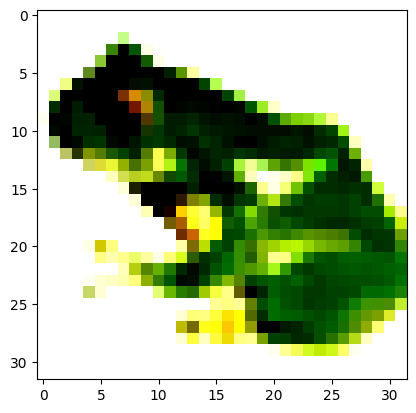

In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()

id = 9729
다음 그림은 Deer 입니다.
모델의 예측 : Cat
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 0.0, 'Bird': 9.0, 'Cat': 53.0, 'Deer': 8.0, 'Dog': 3.0, 'Frog': 18.0, 'Horse': 6.0, 'Ship': 0.0, 'Truck': 0.0}
틀렸어요


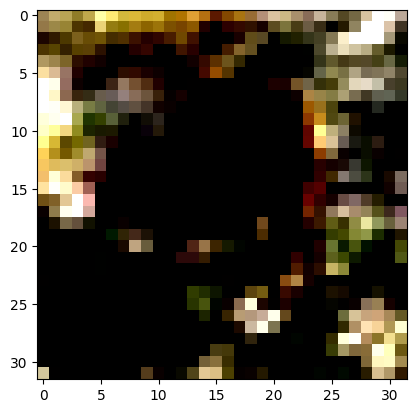

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]


print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()